# Tarefa 01 Módulo 24 Combinação de Modelos II


## 1). Cite 5 diferenças entre o Random Forest e o AdaBoost

1) Random Forest tem várias árvores ou uma "floresta de árvores" e no AdaBoost tem uma floresta de stamps, ou seja, a cada passo é um stamp.

2) Na Random Forest temos árvores independentes, árvores em paralelo e independentes com respostas independentes que no final faz uma junção de tudo, no AdaBoost temos uma árvore que influência na seguinte, um stamp que influência no seguinte, que influênciam no seguinte e assim por diante.

3) No Random Forest todas as árvore tem o mesmo peso, no AdaBoost as respostas tem pesos diferentes, pois os stamps classificama suas respostas dando pesos diferentes a elas.

4) É mais resistente ao overfitting devido à aleatoriedade na seleção de amostras e características para cada árvore. Já o AdaBoost pode ser mais suscetível ao overfitting, especialmente em dados ruidosos ou com muitos outliers, porque se concentra em corrigir erros anteriores

5) A Random Forest são em médias mais rápidas, árvores construídas em paralelo podem performar mais rápido já que não dependem uma da outra. O AdaBoost é mais lento, construção sequencial de árvores a árvore seguinte depende da árvore anterior e isso torna o processo mais lento apesar das árvores menores.

---

# 2). Acesse o link Scikit-learn– adaboost , leia a explicação (traduza se for preciso) e crie um jupyter notebook contendo o exemplo do AdaBoost.

---

### Um dos exemplos contidos no link do Scikit-learn- adaboost sobre: Decision Tree Regression with AdaBoost

In [8]:
import numpy as np
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [9]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

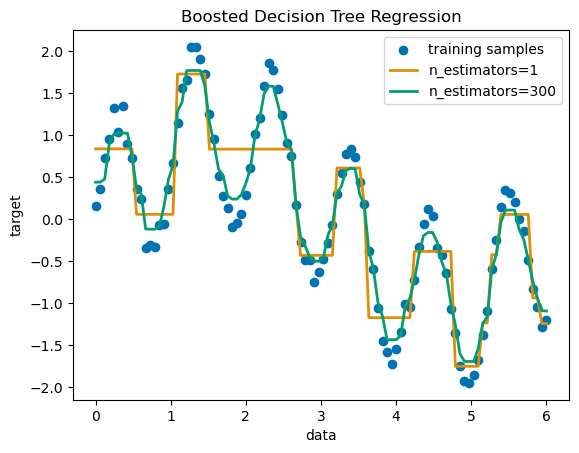

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

# 3).Cite 5 Hyperparametros importantes no AdaBoost.


---

**n_estimators :** O número de weak learners é controlado por este parâmetro, ou seja, controla quantas intereações de treinamento o AdaBoost realizará.

**learning_rate:** Este parâmetro controla a contribuição dos weak learners na combinação final.

**estimator :** Este é o parâmetro que especifica os weak learners o modelo que será treinado em cada interação.

**random_state:** Este parâmetro controla a aleatoriedade do processo de treinamento, definindo a semente para a geração de números aleatórios, permitindo a reprodutibilidade dos resultados

**max_depth :** Este é o estimador que define a profundidade da árvore, que normalmente é 1.

# 4). (Opcional) Utilize o GridSearch para encontrar os melhores hyperparametros para o conjunto de dados do exemplo (load_iris)

In [7]:
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defininod o modelo base para o AdaBoost

base_estimator = DecisionTreeClassifier()

param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'base_estimator__max_depth': [1, 2, 3]
}

# Criando o modelo AdaBoost com o modelo base 

ada = AdaBoostClassifier(base_estimator=base_estimator)

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Treinando o modelo com o GridSearchCV
grid_search.fit(X_train, y_train)

# Obtendo os melhores parâmetros
best_params = grid_search.best_params_
print(f'Melhores parâmetros encontrados: {best_params}')

# Treinando modelo com os melhores parâmetros
best_ada = grid_search.best_estimator_
best_ada.fit(X_train, y_train)


# Realizando predições no conjutno de teste

y_pred = best_ada.predict(X_test)

# Avaliando a acurácia do modelo

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo : {accuracy:.2f}')


C:\Users\Xam_j\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Melhores parâmetros encontrados: {'base_estimator__max_depth': 3, 'learning_rate': 1.0, 'n_estimators': 200}


C:\Users\Xam_j\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Acurácia do modelo : 1.00
